In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import Data

In [3]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
white_wine.Name = 'white wine'
red_wine.Name = 'red wine'

Get overview of red wine data

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
red_wine.shape

(1599, 12)

1599 entries and 12 columns for red wine.

In [6]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Note that the 'quality' values are integers.

Check for missing values.

In [7]:
red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Ok great. No missing values

Get some summary stats for red wine

In [8]:
red_wine.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [9]:
# Create new column, 'quality_label'.   # Note, the quality is always an integer.
# 0 =< quality  <= 5: 'low'
# 6 =< quality <=7: 'medium'
# 8 =< quality <= 10: 'high'

red_wine['quality_label']= red_wine['quality'].apply(lambda val: 'low' if val <=5 else 'medium' if val <= 7 else 'high')

# Convert 'quality_label' into 'categorical' data type. 

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories = ['low', 'medium', 'high'])

Repeat for white wines

In [10]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
white_wine.shape

(4898, 12)

Note that there are over three times as many rows for the white wine. <br>
We will likely have to normalise for some plots later

In [12]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Good. No missing values

In [13]:
white_wine.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


In [14]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories = ['low', 'medium', 'high'])

In [15]:
# Add wine_type column for red and white
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

In [16]:
# Concatenate red and white wines into single dataframe
wines = pd.concat([red_wine, white_wine])

In [17]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low,red


In [18]:
# Shuffle the dataset so the whites and reds are randomly distributed. 

# reset_index –> Assign new numbers (from 0 to n) for indices; drop = True –> remove old indices
# DataFrame.sample(frac = float) –> Return randomised sample (size determined by 'frac' param)
# random_state = seed for pseudo random number generator

wines = wines.sample(frac=1, random_state = 42).reset_index(drop = True)

In [19]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white


In [20]:
# Create new dataframes with summary stats for selected columns:

red_wine_stats = red_wine.describe()[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].round(2)
white_wine_stats = white_wine.describe()[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']].round(2)

In [21]:
red_wine_stats.head()

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,2.54,46.47,0.66,10.42,0.53,5.64
std,1.41,32.90,0.17,1.07,0.18,0.81
min,0.90,6.00,0.33,8.40,0.12,3.00
25%,1.90,22.00,0.55,9.50,0.39,5.00


In [22]:
white_wine_stats.head()

,residual sugar,total sulfur dioxide,sulphates,alcohol,volatile acidity,quality
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,6.39,138.36,0.49,10.51,0.28,5.88
std,5.07,42.50,0.11,1.23,0.10,0.89
min,0.60,9.00,0.22,8.00,0.08,3.00
25%,1.70,108.00,0.41,9.50,0.21,5.00


In [23]:
# Concatenate the two stats tables to get a better overview

wines_stats = pd.concat([red_wine_stats, white_wine_stats], axis = 1, keys = ['Red Wine Statistics', 'White Wine Statistics'])
wines_stats

Red Wine Statistics                                          \
           residual sugar total sulfur dioxide sulphates  alcohol   
count             1599.00              1599.00   1599.00  1599.00   
mean                 2.54                46.47      0.66    10.42   
std                  1.41                32.90      0.17     1.07   
min                  0.90                 6.00      0.33     8.40   
25%                  1.90                22.00      0.55     9.50   
50%                  2.20                38.00      0.62    10.20   
75%                  2.60                62.00      0.73    11.10   
max                 15.50               289.00      2.00    14.90   

                                White Wine Statistics                       \
      volatile acidity  quality        residual sugar total sulfur dioxide   
count          1599.00  1599.00               4898.00              4898.00   
mean              0.53     5.64                  6.39               138.36   
std               0.18     0.81                  5.07                42.50   
min               0.12     3.00                  0.60                 9.00   
25%               0.39     5.00                  1.70               108.00   
50%               0.52     6.00                  5.20               134.00   
75%               0.64     6.00                  9.90               167.00   
max               1.58     8.00                 65.80               440.00   

                                                    
      sulphates  alcohol volatile acidity  quality  
count   4898.00  4898.00          4898.00  4898.00  
mean       0.49    10.51             0.28     5.88  
std        0.11     1.23             0.10     0.89  
min        0.22     8.00             0.08     3.00  
25%        0.41     9.50             0.21     5.00  
50%        0.47    10.40             0.26     6.00  
75%        0.55    11.40             0.32     6.00  
max        1.08    14.20             1.10     9.00

Quick glance tells us:

Mean residual sugar and total sulfur dioxide = higher in white wine.<br>
Mean sulphates, volatile acidity = higher in red wine.<br>
<br>
std for residual sugar much higher in white wine.<br>
std for total sulfur dioxide much higher in white wine. <br>
std for sulphates slightly higher in red wine.<br>

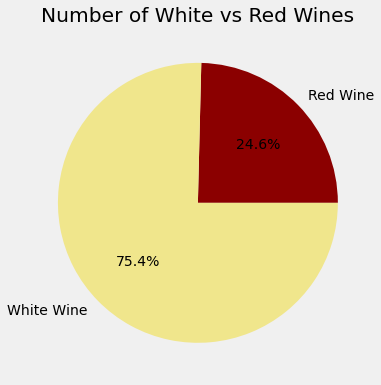

In [24]:
# Create pie chart to compare total number of white vs red wines

labels = ['Red Wine', 'White Wine']
values = [len(red_wine), len(white_wine)]
colors = ['DarkRed', 'Khaki']

plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,6))
plt.pie(values, labels = labels, autopct = "%1.1f%%", colors = colors)
plt.title('Number of White vs Red Wines')
plt.savefig('pieplot_white_vs_red.png')
plt.show()

Distribution of quality labels for red and white wines

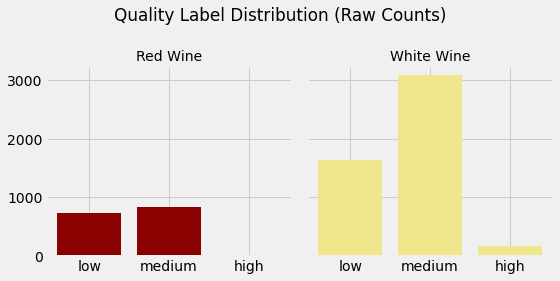

In [47]:
red_wine_by_quality = red_wine.groupby('quality_label').count().iloc[:,0]
white_wine_by_quality = white_wine.groupby('quality_label').count().iloc[:,0]

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1,2, figsize = (8,4), sharey = True)
plt.suptitle('Quality Label Distribution (Raw Counts)')

ax[0].bar(x = red_wine_by_quality.index, height = red_wine_by_quality.values, color = 'DarkRed')
ax[0].set_title('Red Wine', fontsize = 14)

ax[1].bar(x = white_wine_by_quality.index, height = white_wine_by_quality.values, color = 'Khaki')
ax[1].set_title('White Wine', fontsize = 14)

plt.tight_layout()
plt.savefig('quality_label_distribution_raw.png')
plt.show()

It's difficult to get a clear overview of how the distribution differs between red vs white, because there are way more entries for white wine.<br>
So we'll normalise.

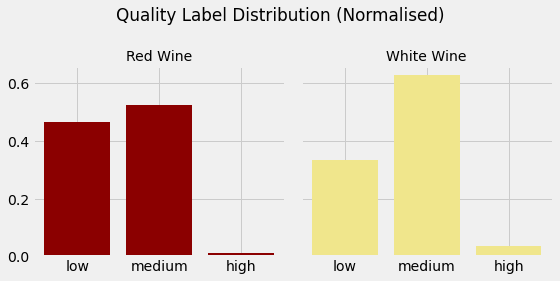

In [49]:
red_wine_by_quality = red_wine.groupby('quality_label').count().iloc[:,0]
white_wine_by_quality = white_wine.groupby('quality_label').count().iloc[:,0]


# Normalise red wine values
red_x = red_wine_by_quality.index
red_y = list(red_wine_by_quality.values)
red_y_sum = sum(red_y)
red_y_norm = [val / red_y_sum for val in red_y]

# Normalise white wine values
white_x = white_wine_by_quality.index
white_y = list(white_wine_by_quality.values)
white_y_sum = sum(white_y)
white_y_norm = [val / white_y_sum for val in white_y]


plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1,2, figsize = (8,4), sharey = True)
plt.suptitle('Quality Label Distribution (Normalised)')

ax[0].bar(x = red_x, height = red_y_norm, color = 'DarkRed')
ax[0].set_title('Red Wine', fontsize = 14)

ax[1].bar(x = white_x, height = white_y_norm, color = 'Khaki')
ax[1].set_title('White Wine', fontsize = 14)

plt.tight_layout()
plt.savefig('quality_label_distribution_normalised.png')
plt.show()

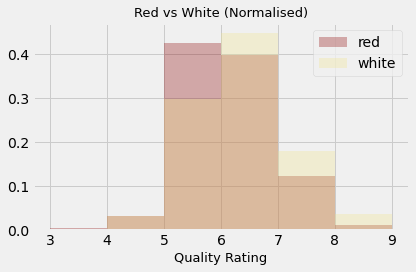

In [27]:
# We can see the same information in a normalised histogram

fig, ax = plt.subplots()

ax.hist(red_wine['quality'], color = 'DarkRed', 
        density = True,
        label = 'red',
        bins = np.arange(3,10, 1), alpha = 0.3)
ax.hist(white_wine['quality'], color = 'Khaki', 
        density = True, 
        label = 'white',
        bins = np.arange(3,10,1), alpha = 0.3)

ax.set_xlabel ('Quality Rating', fontsize = 13)
ax.set_title('Red vs White (Normalised)', fontsize = 13)
ax.legend()

plt.tight_layout()
plt.show()

In [28]:
"""
Function for detecting outliers. 

Two input parameters: dataframe, column label

Output: one tuple 
(int1, int2, list1, list2)

int1 = number of upper outliers
int2 = number of lower outliers
list1 = row numbers of upper outliers
list2 = row numbers of lower outliers
"""

def detect_outliers(df, column):
    Q1 = np.percentile (df[column], 25)
    Q3 = np.percentile (df[column], 75)
    IQR = Q3 - Q1
    upper = Q3 + 1*IQR        # upper value threshold
    lower = Q1 - 1*IQR        # lower value threshold

    upper_mask = df[column] >= upper
    lower_mask = df[column] <= lower

    num_upper_outliers = len (df[upper_mask][column].values)
    num_lower_outliers = len (df[lower_mask][column].values)

    rows_upper_outliers = list (np.where(upper_mask)[0])      # indices for upper outliers as a list 
    rows_lower_outliers = list(np.where(lower_mask)[0])      # indices for lower outliers as a list

    return (num_upper_outliers, num_lower_outliers, rows_upper_outliers, rows_lower_outliers)

In [29]:
"""
Function for removing outliers from a df column

input params: df, column 
output: df with outlier rows dropped
"""

def drop_outliers (df, column):
    int1, int2, list1, list2 = detect_outliers(df, column)
    temp = df.copy()                            # important to call .copy() method, otherwise the original df also gets modified
    temp.drop(list1, inplace = True)
    temp.drop(list2, inplace = True)
    temp.Name = df.Name                         # Make sure to give the temp dataframe the same name; will need this later when plotting.
    return temp

In [30]:
# Now use drop_outliers to create the histograms without the outliers

features = ['fixed acidity','volatile acidity','citric acid',
            'residual sugar','chlorides','free sulfur dioxide',
            'total sulfur dioxide', 'density','pH','sulphates','alcohol']

temp1 = []      # List of dataframes for white wine
temp2 = []      # List of dataframes for red wine

for i, feature in enumerate(features):

    temp1.append(drop_outliers(white_wine,feature))    # temp1 now stores the dataframe 'white_wine', but the rows containing outliers for 'feature' are dropped
    temp2.append(drop_outliers(red_wine,feature))
    



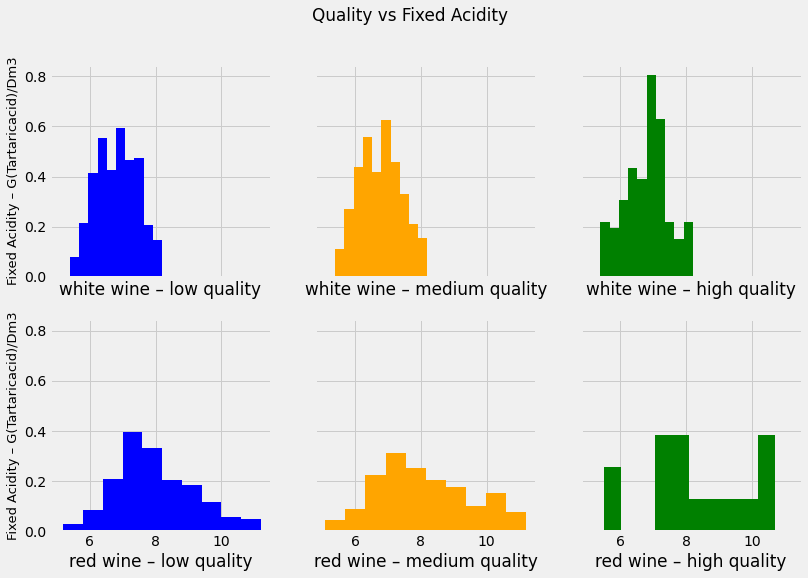

<Figure size 864x288 with 0 Axes>

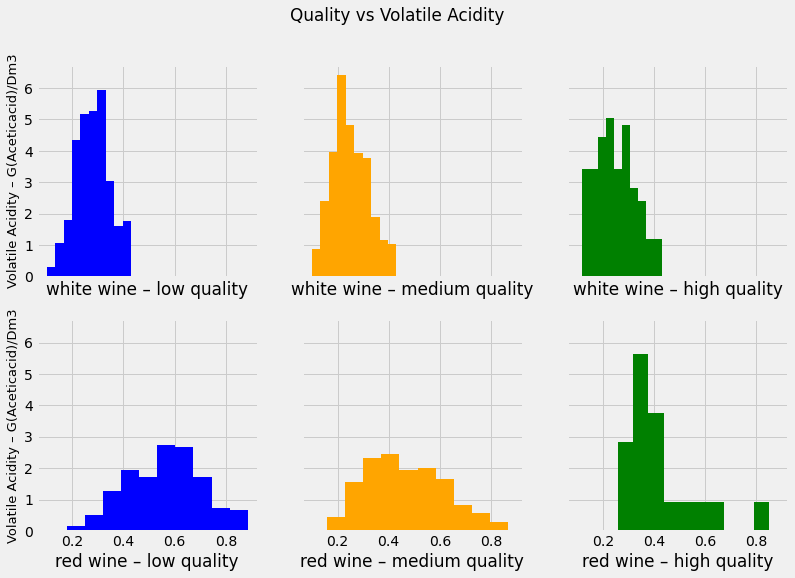

<Figure size 864x288 with 0 Axes>

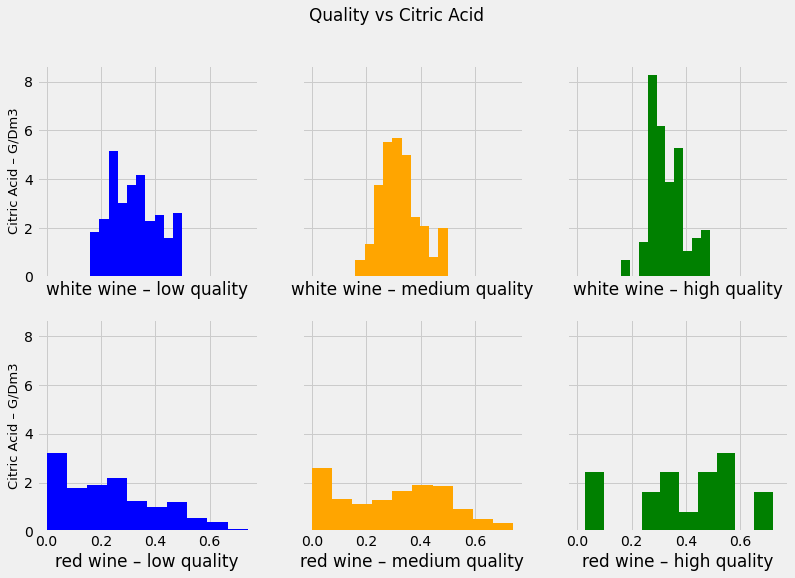

<Figure size 864x288 with 0 Axes>

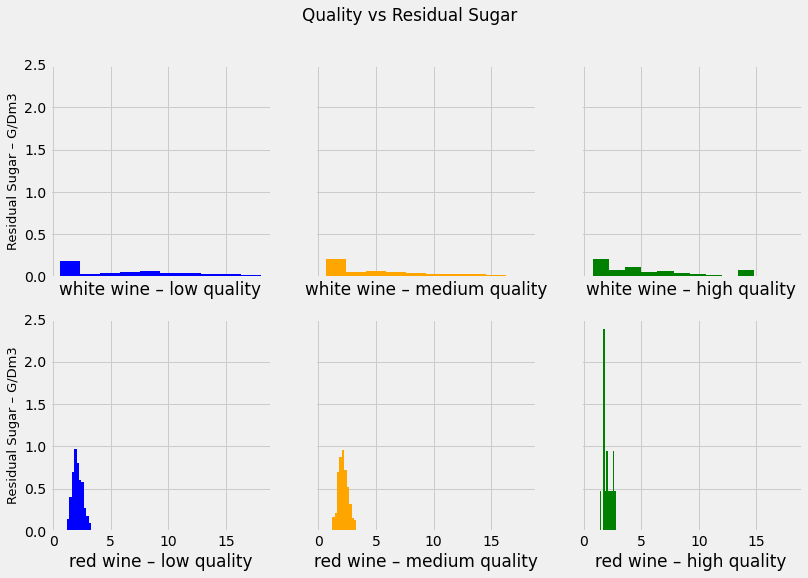

<Figure size 864x288 with 0 Axes>

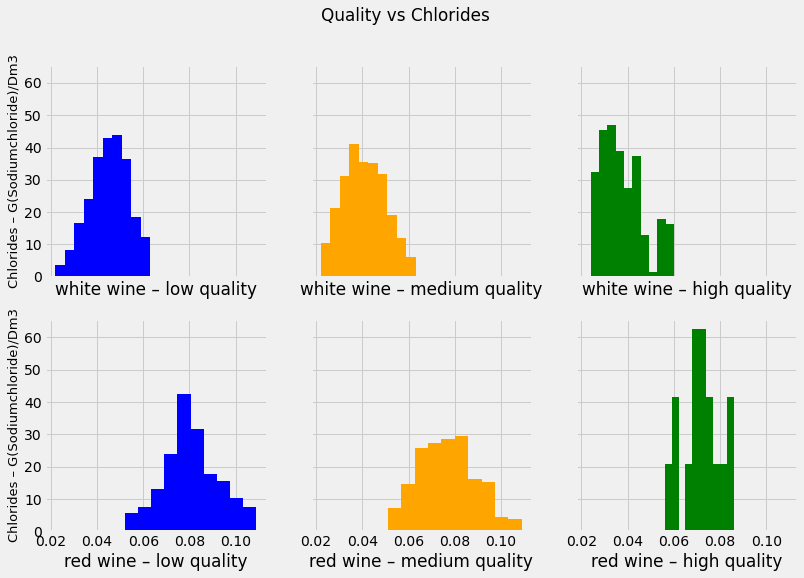

<Figure size 864x288 with 0 Axes>

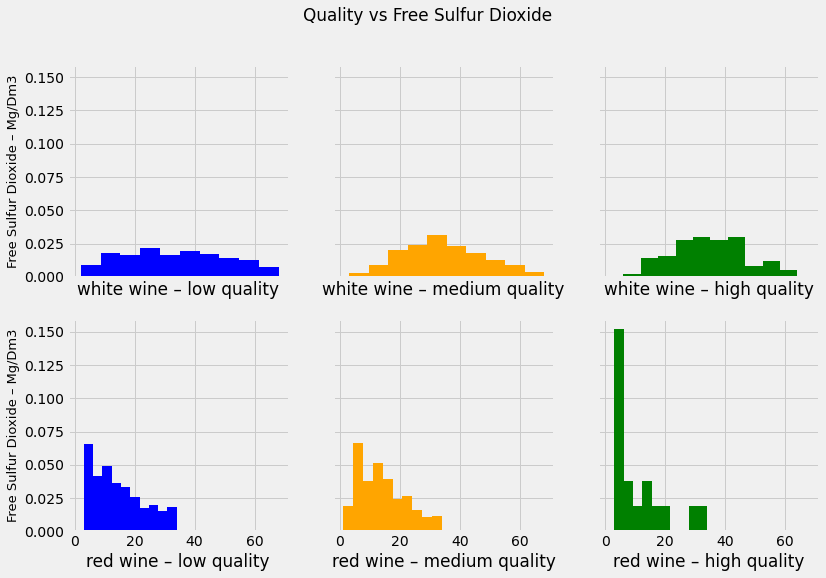

<Figure size 864x288 with 0 Axes>

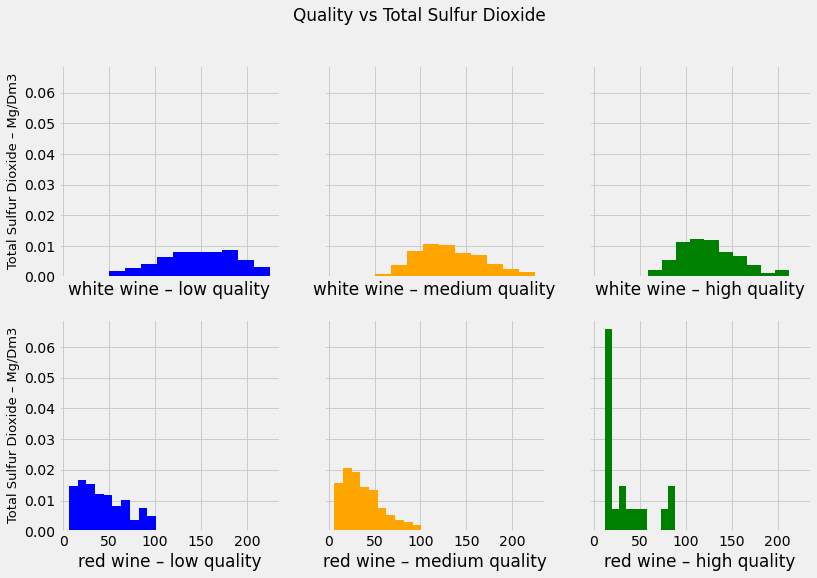

<Figure size 864x288 with 0 Axes>

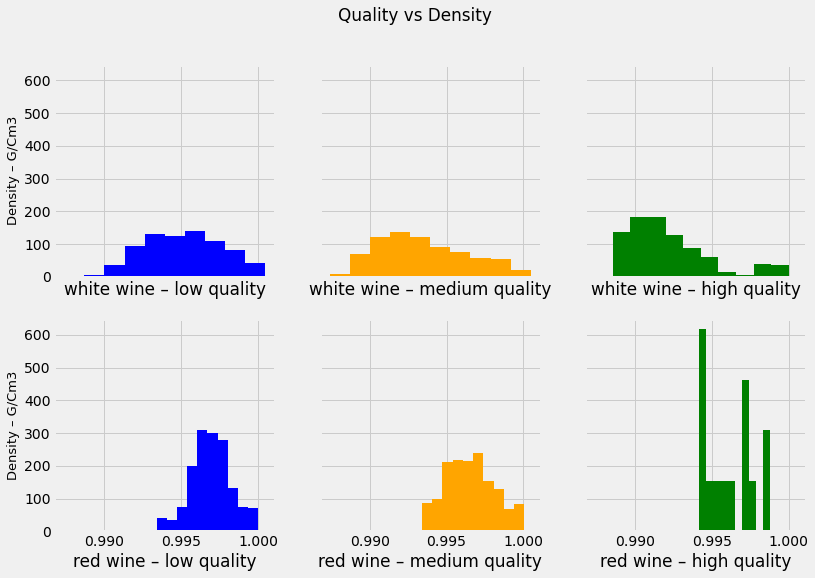

<Figure size 864x288 with 0 Axes>

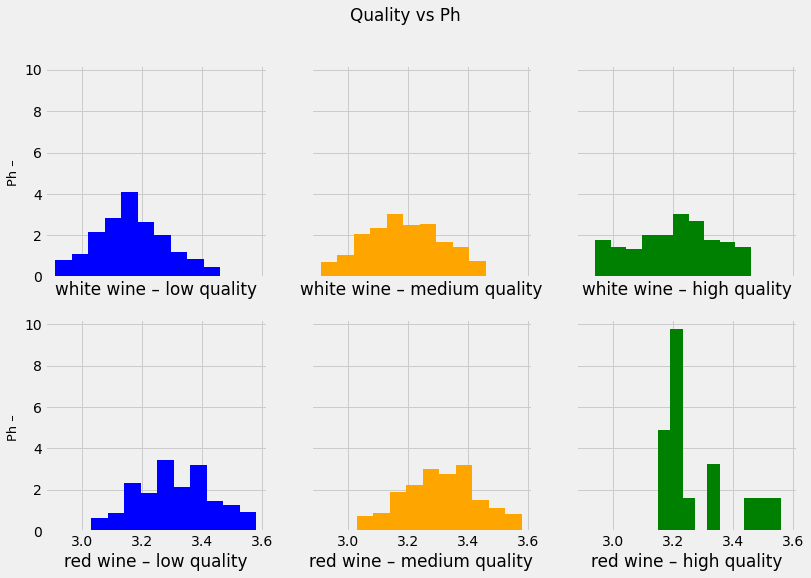

<Figure size 864x288 with 0 Axes>

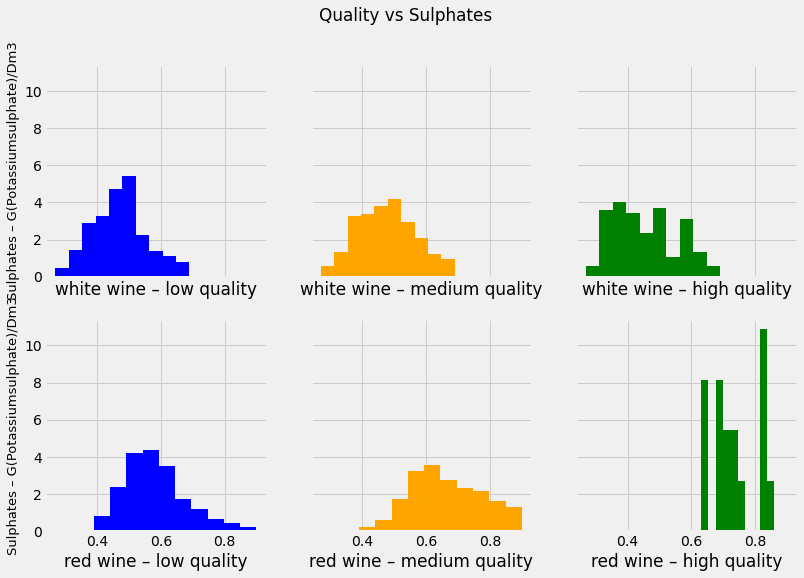

<Figure size 864x288 with 0 Axes>

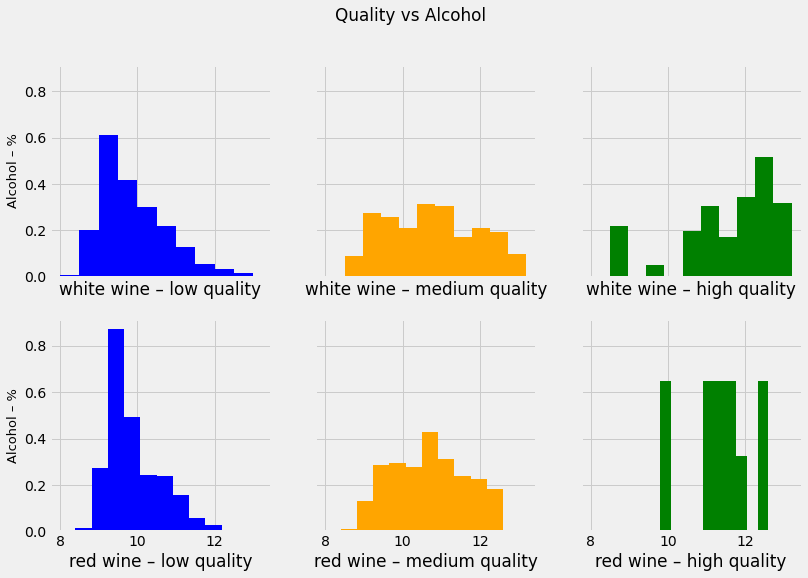

<Figure size 864x288 with 0 Axes>

In [31]:
# Continue to look at red and white wines separately.
# Separate each wine type into low, medium, high quality. 
# For each quality label, plot histogram for each feature invidually.


def plot_histograms(white_wine, red_wine, feature):
 
    white_wine = drop_outliers(white_wine, feature)
    red_wine = drop_outliers(red_wine, feature)
    

    white_wine_low = white_wine [white_wine['quality_label'] == 'low']
    white_wine_medium = white_wine [white_wine['quality_label'] == 'medium']
    white_wine_high = white_wine [white_wine['quality_label'] == 'high']

    red_wine_low = red_wine [red_wine['quality_label'] == 'low']
    red_wine_medium = red_wine [red_wine['quality_label'] == 'medium']
    red_wine_high = red_wine [red_wine['quality_label'] == 'high']

    feature_units = {'fixed acidity': 'g(tartaricacid)/dm3',
                        'volatile acidity': 'g(aceticacid)/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g(sodiumchloride)/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g(potassiumsulphate)/dm3',
                        'alcohol': '%'
                        }

    fig, ax = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (12,8))
    plt.figure(figsize = (12,4))
    fig.suptitle(f'Quality vs {feature.title()} ')

    ax[0][0].hist(white_wine_low[feature], density = True, color = 'blue')
    ax[0][0].set_xlabel('white wine – low quality')
    ax[0][0].set_ylabel(f'{feature.title()} – {feature_units[feature].title()}', fontsize = 13)

    ax[0][1].hist(white_wine_medium[feature], density = True, color = 'orange')
    ax[0][1].set_xlabel('white wine – medium quality')

    ax[0][2].hist(white_wine_high[feature], density = True, color = 'green')
    ax[0][2].set_xlabel('white wine – high quality')


    ax[1][0].hist(red_wine_low[feature], density = True, color = 'blue')
    ax[1][0].set_xlabel('red wine – low quality')
    ax[1][0].set_ylabel(f'{feature.title()} – {feature_units[feature].title()}', fontsize = 13)

    ax[1][1].hist(red_wine_medium[feature], density = True, color = 'orange')
    ax[1][1].set_xlabel('red wine – medium quality')

    ax[1][2].hist(red_wine_high[feature], density = True, color = 'green')
    ax[1][2].set_xlabel('red wine – high quality')

    plt.show()


feature_units = {'fixed acidity': 'g/dm3',
                        'volatile acidity': 'g/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g/dm3',
                        'alcohol': '%'
                        }

for feature in feature_units:
    plot_histograms(white_wine, red_wine, feature)

In [32]:
"""
Why are my axes so weird even after removing the outliers???
"""

'\nWhy are my axes so weird even after removing the outliers???\n'

We can see that the white wines have a higher ratio of <br>'medium' and 'high' quality wines compared to the red wines. <br>
The red wines have a very tiny proportion of high-quality wines.

Now we want to find out: <br>
What is the relationship between each feature (e.g. pH, density, etc.) <br> and the quality label for each wine type? <br>

First create box plots

In [33]:
# Dataframe with all wines, divided into 'low', 'medium' and 'high'
wines_low = wines[wines['quality_label'] == 'low']
wines_medium = wines[wines['quality_label'] == 'medium']
wines_high = wines[wines['quality_label'] == 'high']

# Dataframe with white wines, divided into 'low', 'medium' and 'high'
white_wine_low = white_wine[white_wine['quality_label'] == 'low']
white_wine_medium = white_wine[white_wine['quality_label'] == 'medium']
white_wine_high = white_wine[white_wine['quality_label'] == 'high']

# Dataframe with red wines, divided into 'low', 'medium' and 'high'
red_wine_low = red_wine[red_wine['quality_label'] == 'low']
red_wine_medium = red_wine[red_wine['quality_label'] == 'medium']
red_wine_high = red_wine[red_wine['quality_label'] == 'high']


feature_units = {'fixed acidity': 'g/dm3',
                        'volatile acidity': 'g/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g/dm3',
                        'alcohol': '%'
                        }

In [34]:
"""
Function with one input parameter, the feature name.

Function that plots three subplots in one (1x3) figure. 
Each subplot has three boxplots, with each boxplot 
representing 'low', 'medium' or 'high' quality.
"""

def boxplot_all_white_red (feature):

    fig, ax = plt.subplots(1,3, figsize = (12,4), sharex = True, sharey = True)
    fig.suptitle(feature, fontsize = 16)

    bps = [0, 0, 0]                             # bps will hold three boxplot objects.
    colors = ['blue', 'orange', 'green']        # colours for low, medium, and high qualities.

    bps[0] = ax[0].boxplot(
                                [wines_low[feature], 
                                    wines_medium[feature], 
                                    wines_high[feature]], 
                                    patch_artist = True, 
                                    labels = ['Low', 'Medium', 'High'],
                                    widths = 0.7
                                )
    ax[0].set_title('All', fontsize = 13)
    ax[0].set_xlabel('Quality Label',fontsize = 13)
    ax[0].set_ylabel(f"{feature} – {feature_units[feature]}", fontsize = 13)

    bps[1] = ax[1].boxplot(
                            [white_wine_low[feature], 
                                white_wine_medium[feature], 
                                white_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7
                            )
    ax[1].set_title('White',fontsize = 13)
    ax[1].set_xlabel('Quality Label',fontsize = 13)

    bps[2] = ax[2].boxplot(
                                [red_wine_low[feature], 
                                red_wine_medium[feature], 
                                red_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7
                                            )
    ax[2].set_title('Red',fontsize = 13)
    ax[2].set_xlabel('Quality Label',fontsize = 13)

    for bp in bps:
        for patch, color in zip (bp['boxes'], colors):
                patch.set_facecolor(color)
        for flier in bp['fliers']:
            flier.set(marker = 'D')
    
    return fig, ax
    


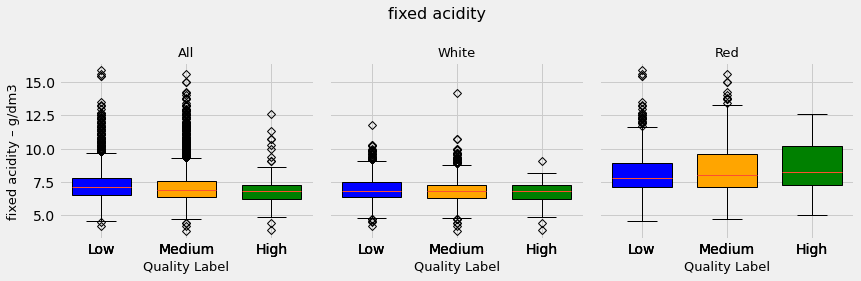

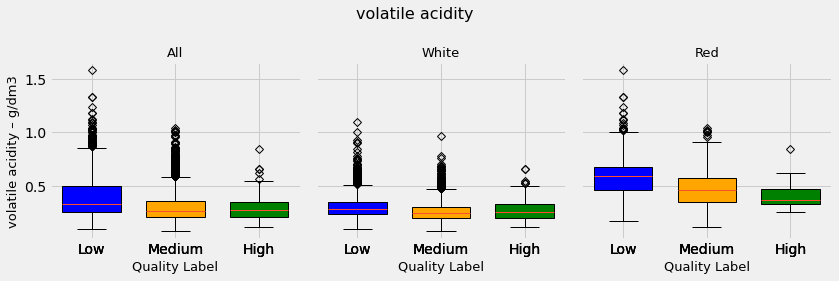

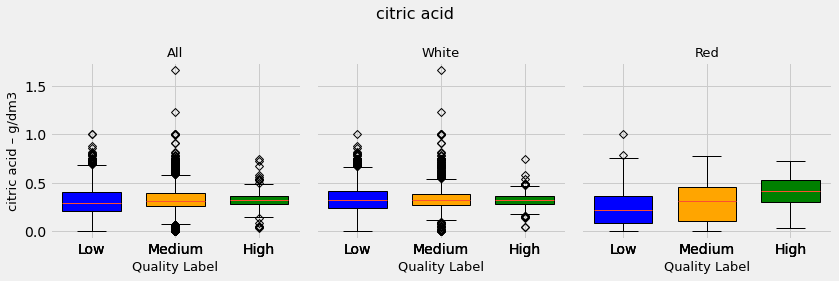

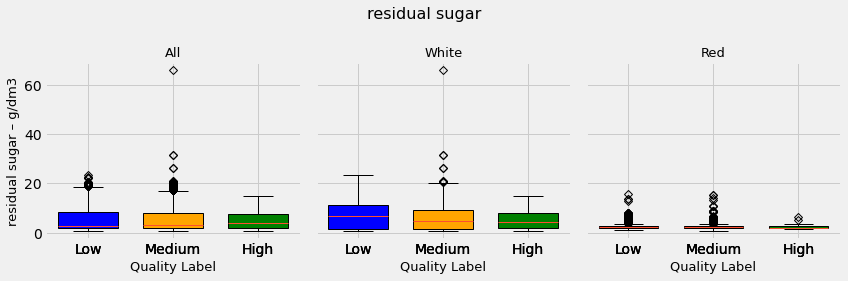

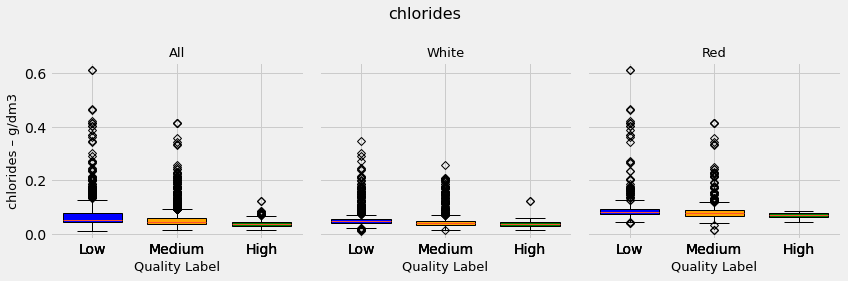

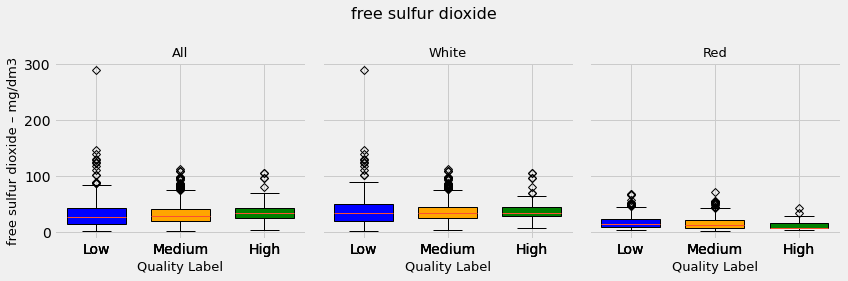

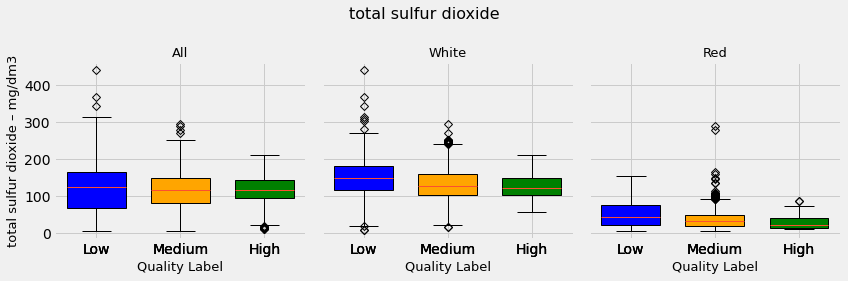

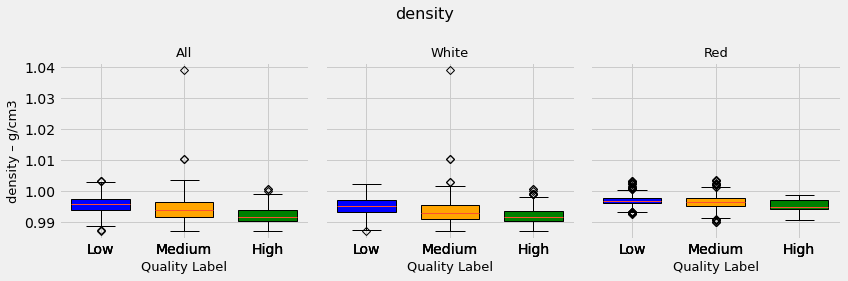

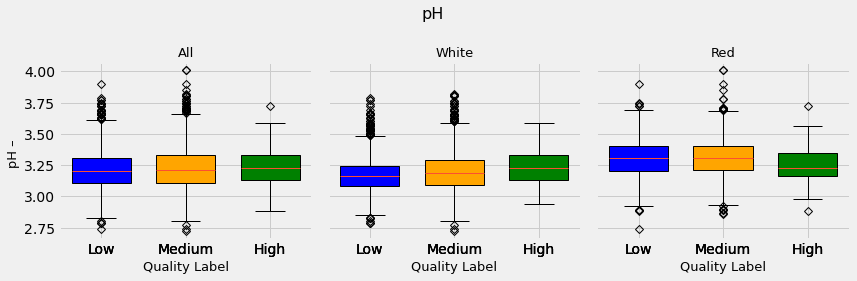

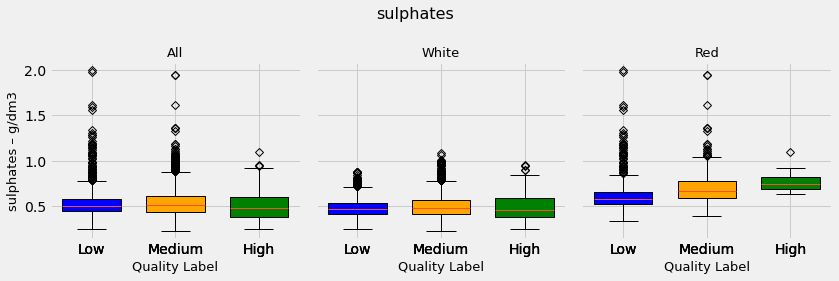

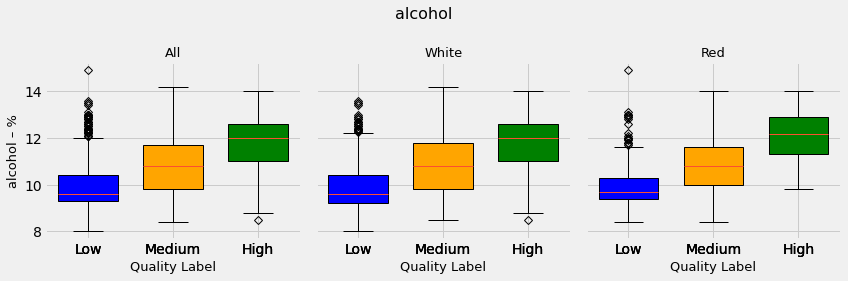

In [51]:
"""
 Now call the boxplot_all_white_red() function for 
all desired features using a for loop
"""

for feature in feature_units:
    boxplot_all_white_red(feature)
    plt.tight_layout()
    plt.savefig(f'boxplot_with_outlier_{feature}.png')
    plt.show()

We see that for some of the features (such as 'residual sugar' and 'chlorides'), <br>
the outliers are obscuring the trends. So we'll create the same box plots <br>
but with the outliers removed.

In [36]:
"""
Same function as boxplot_all_white_red,
but modified to ignore outliers. 

(showfliers = False)
"""

def boxplot_all_white_red_ignore_fliers (feature):

    fig, ax = plt.subplots(1,3, figsize = (12,4), sharex = True, sharey = True)
    fig.suptitle(feature, fontsize = 16)

    bps = [0, 0, 0]                             # bps will hold three boxplot objects.
    colors = ['blue', 'orange', 'green']        # colours for low, medium, and high qualities.

    bps[0] = ax[0].boxplot(
                                [wines_low[feature], 
                                    wines_medium[feature], 
                                    wines_high[feature]], 
                                    patch_artist = True, 
                                    labels = ['Low', 'Medium', 'High'],
                                    widths = 0.7,
                                    showfliers = False
                                )
    ax[0].set_title('All', fontsize = 13)
    ax[0].set_xlabel('Quality Label',fontsize = 13)
    ax[0].set_ylabel(f"{feature} – {feature_units[feature]}", fontsize = 13)

    bps[1] = ax[1].boxplot(
                            [white_wine_low[feature], 
                                white_wine_medium[feature], 
                                white_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7,
                                showfliers = False
                            )
    ax[1].set_title('White',fontsize = 13)
    ax[1].set_xlabel('Quality Label',fontsize = 13)

    bps[2] = ax[2].boxplot(
                                [red_wine_low[feature], 
                                red_wine_medium[feature], 
                                red_wine_high[feature]], 
                                patch_artist = True, 
                                labels = ['Low', 'Medium', 'High'],
                                widths = 0.7,
                                showfliers = False
                                            )
    ax[2].set_title('Red',fontsize = 13)
    ax[2].set_xlabel('Quality Label',fontsize = 13)

    for bp in bps:
        for patch, color in zip (bp['boxes'], colors):
                patch.set_facecolor(color)
        for flier in bp['fliers']:
            flier.set(marker = 'D')
    
    return fig, ax

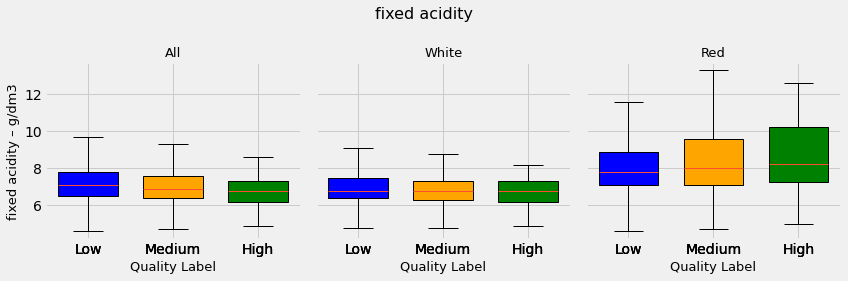

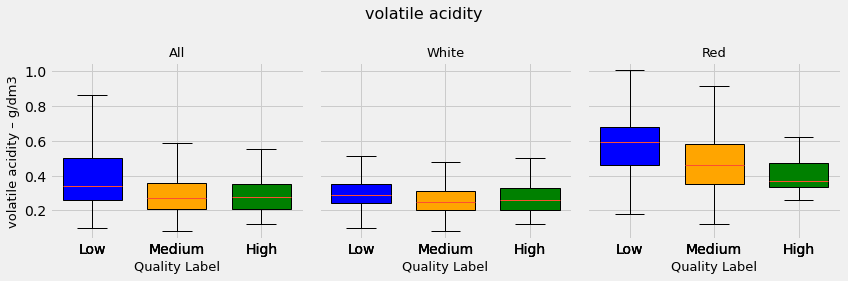

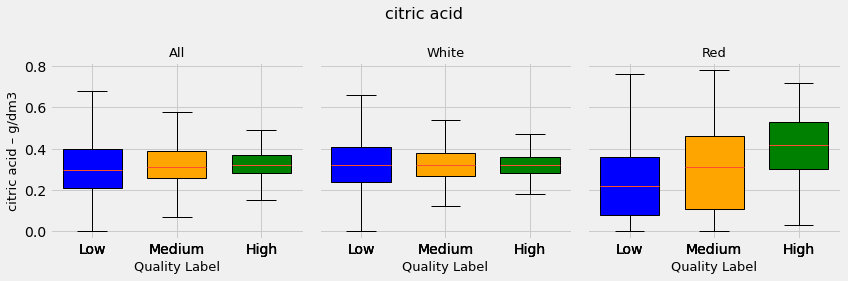

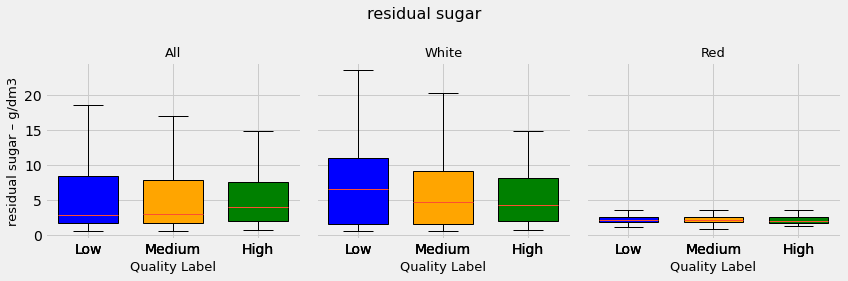

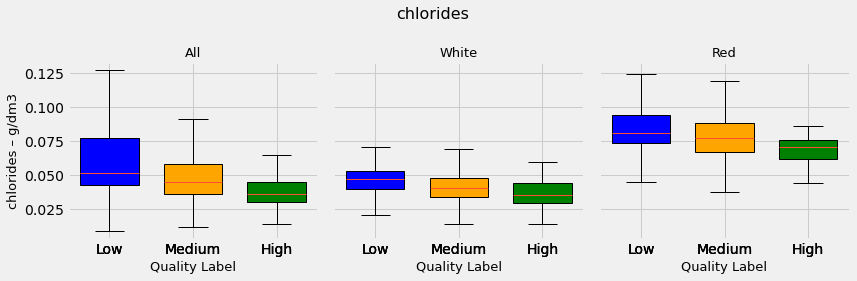

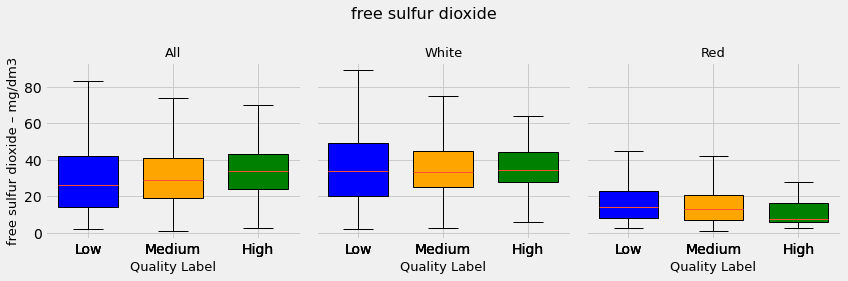

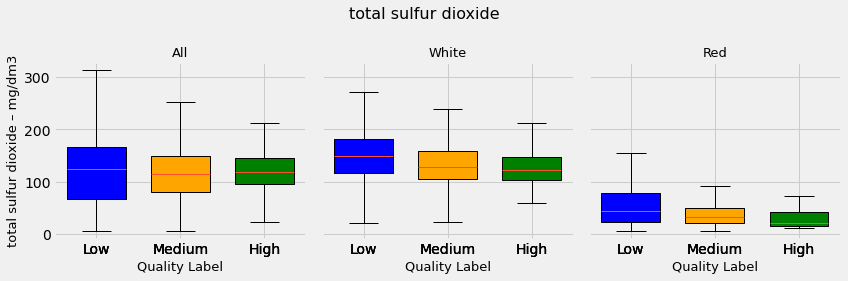

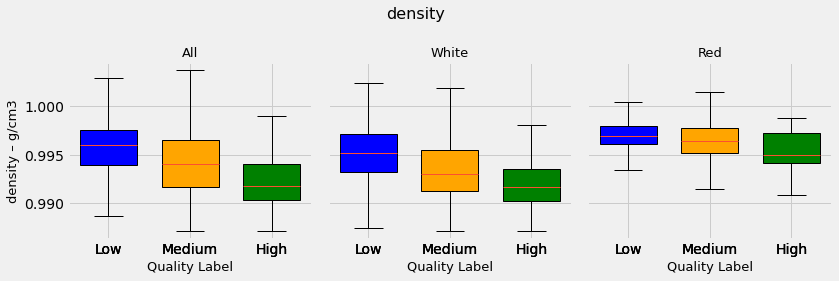

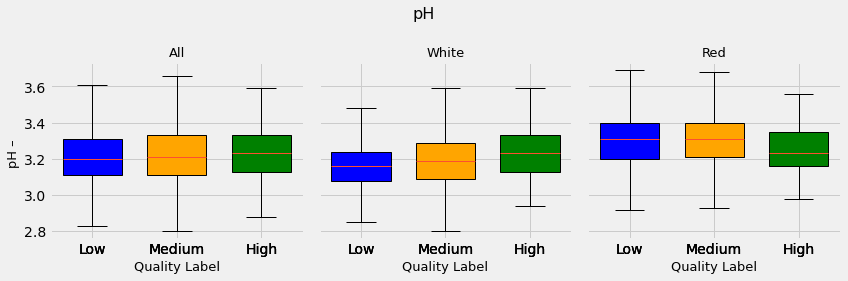

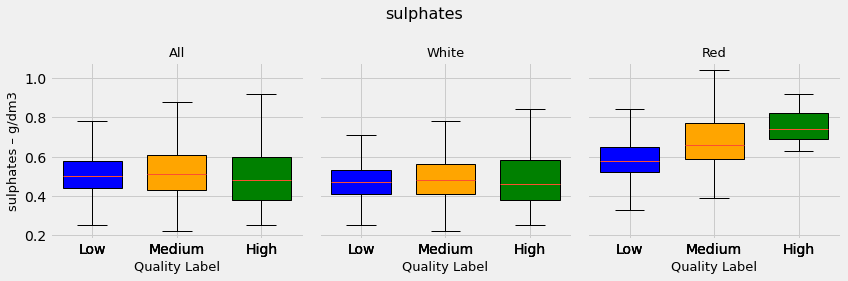

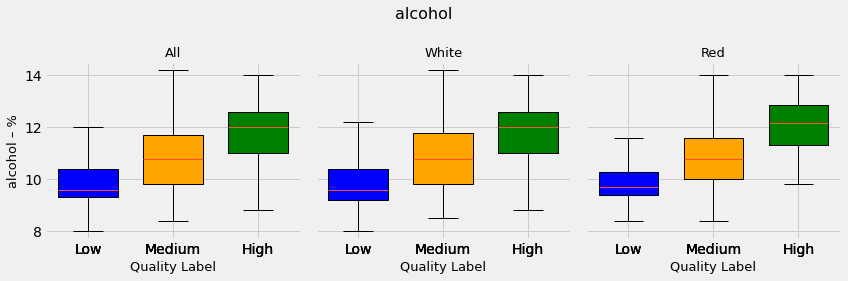

In [52]:
"""
 Now call the boxplot_all_white_red_ignore_fliers() function for 
all desired features using a for loop
"""

for feature in feature_units:
    boxplot_all_white_red_ignore_fliers(feature)
    plt.savefig(f'boxplot_with_outliers_removed_{feature}.png')
    plt.tight_layout()
    plt.show()

fixed acidity – red wine has higher level than white wine. but the level doesn't vary significantly as function of quality label. <br>

volatile acidity – for red wine, decreases as quality goes up. For white wine, stays stable. <br>

citric acid – for white wine, stays stable, though the variance reduces as quality goes up. For red wine, goes up. <br>

residual sugar – lower for red wine than for white. But doesn't vary much as function of quality label. <br>

chlorides – higher in red wines; decreases as quality label goes up. <br>

free sulfur dioxide – lower in red than white; no significant trend as function of quality label.<br>

total sulfur dioxide – lower in red than white; goes slightly down as quality label increases. <br>

density – slightly higher in red than white; decreases as quality goes up. <br>

pH – whites lower than reds; for whites, goes up as quality increases, for reds, goes down as quality increases. pH meets at similar level for 'high quality' red and white wines. <br>

sulphates – for white wines, lower and stable; for red wines, higher and increasing. <br>

alcohol – increases for both white and red. <br>

Important takeaway: we must always consider red and white wines separately. <br>


<h1>Create 2D scatter plots with 'quality' on y-axis. <br>
Also fit a linear regression line </h1>

In [38]:
import statsmodels.api as sm

In [39]:
"""
Function to create 2D scatter plot with OLS regression line. 
Four input parameters:
df1, df2, feature1, feature2

Will have two plots side by side: 
white wine on the left, red wine on the right.
"""

def create_2D_scatter_line(df1, df2, feature1, feature2):

    
    x_1 = df1[feature1].tolist()
    y_1 = df1[feature2].tolist()
    x_1 = sm.add_constant(x_1)
    result_1 = sm.OLS(y_1, x_1).fit()

    
    x_2 = df2[feature1].tolist()
    y_2 = df2[feature2].tolist()
    x_2 = sm.add_constant(x_2)
    result_2 = sm.OLS(y_2, x_2).fit()

    # Gradient and constant for white wine and red wine
    grad_1 = result_1.params[1]
    constant_1 = result_1.params[0]

    grad_2 = result_2.params[1]
    constant_2 = result_2.params[0]

    print (f"grad_1: {grad_1}, grad_2: {grad_2}, constant_1: {constant_1}, constant_2: {constant_2}")

    # Now we plot the scatter plots.

    fig, ax = plt.subplots(1, 2, figsize = (10,5))

    ax[0].scatter(df1[feature1], df1[feature2])
    ax[0].set_xlabel (feature1)
    ax[0].set_ylabel(feature2)
    ax[0].set_title(df1.Name)

    ax[1].scatter(df2[feature1], df2[feature2])
    ax[1].set_xlabel (feature1)
    ax[1].set_ylabel(feature2)
    ax[1].set_title(df2.Name)

    max_x_1 = df1[feature1].max()
    min_x_1 = df2[feature1].min()

    x_range_1 = np.arange(min_x_1, max_x_1, 0.1)
    y_1 = grad_1 * x_range_1 + constant_1

    max_x_2 = df2[feature1].max()
    min_x_2 = df2[feature1].min()

    x_range_2 = np.arange(min_x_2, max_x_2, 0.1)
    y_2 = grad_2 * x_range_2 + constant_2


    ax[0].plot(x_range_1, y_1, color = 'r')
    ax[1].plot(x_range_2, y_2, color = 'r')

    plt.tight_layout()
    plt.show()

grad_1: -0.11928898863196293, grad_2: 0.057538643743882234, constant_1: 6.695610039009985, constant_2: 5.1573218689248055


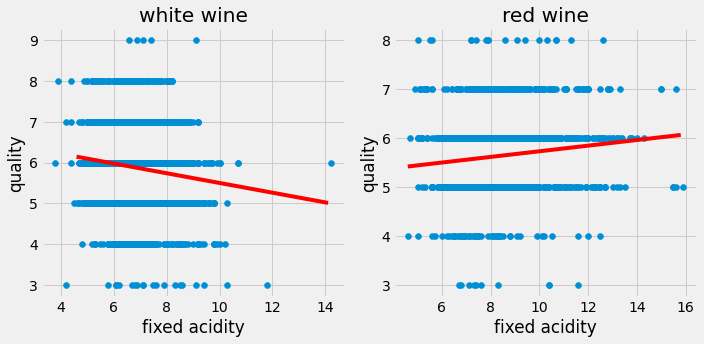

grad_1: -1.7109474213019527, grad_2: -1.7614377801126708, constant_1: 6.3539652755075196, constant_2: 6.565745506471794


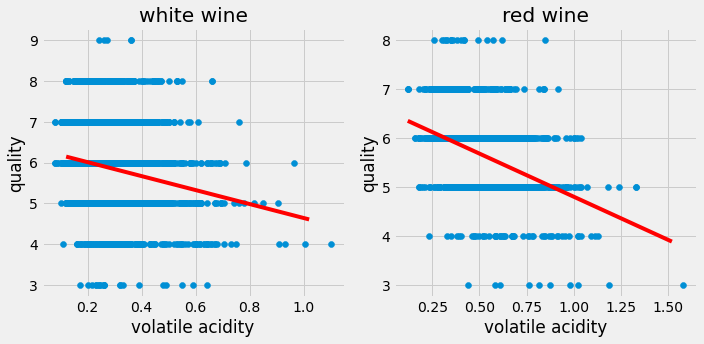

grad_1: -0.06739331782055948, grad_2: 0.9384520388029649, constant_1: 5.900431625181896, constant_2: 5.381724900629807


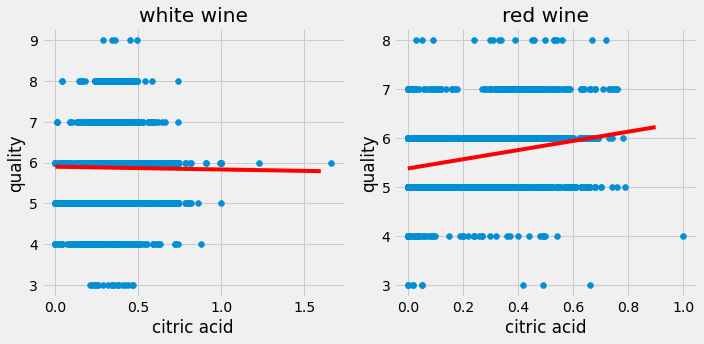

grad_1: -0.017038016397315354, grad_2: 0.00786511808072997, constant_1: 5.986806381996805, constant_2: 5.6160545090027245


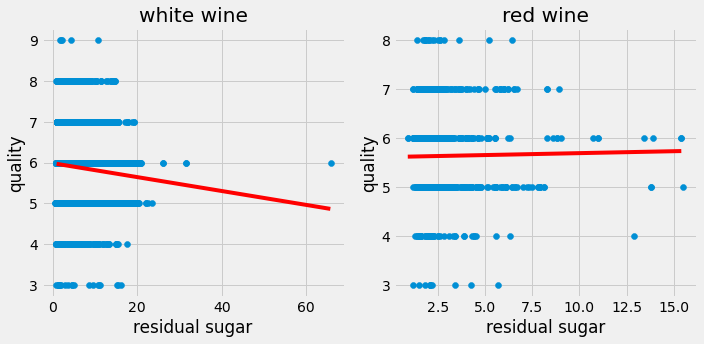

grad_1: -8.509991032116627, grad_2: -2.211841716399119, constant_1: 6.267431690376323, constant_2: 5.829484659545869


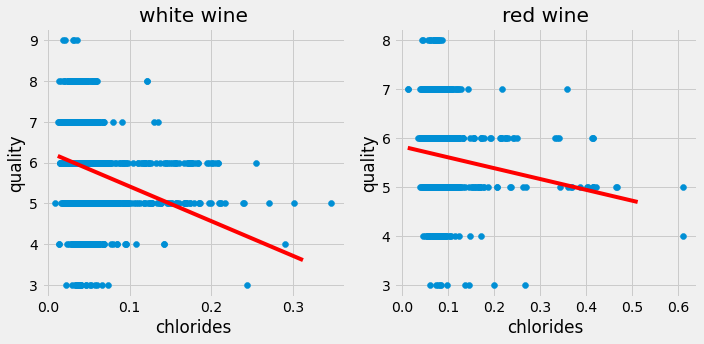

grad_1: 0.00042482745940874327, grad_2: -0.003910867101325621, constant_1: 5.862909506736907, constant_2: 5.698107223577285


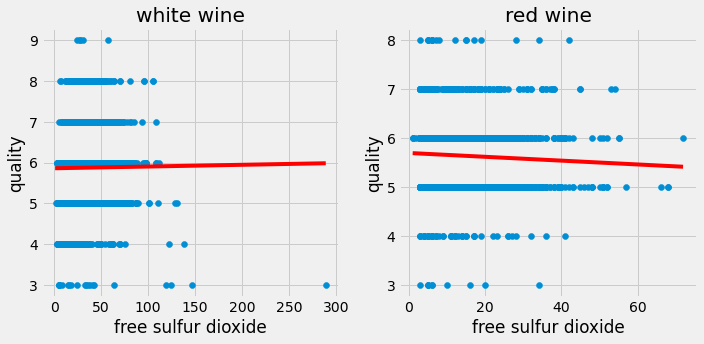

grad_1: -0.003641436898599207, grad_2: -0.00454415145598423, constant_1: 6.381740953966959, constant_2: 5.847179200426845


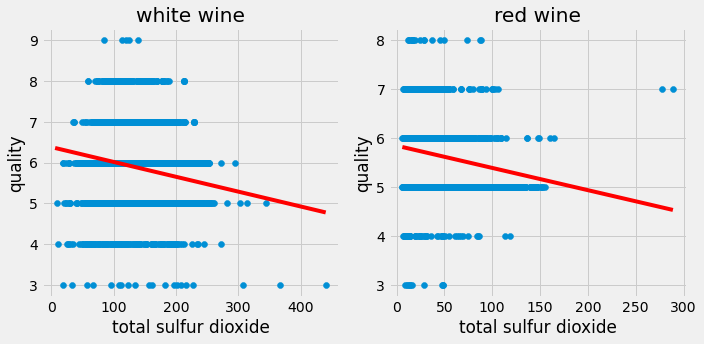

grad_1: -90.94239994213733, grad_2: -74.84601360147616, constant_1: 96.27714457605146, constant_2: 80.23853802079009


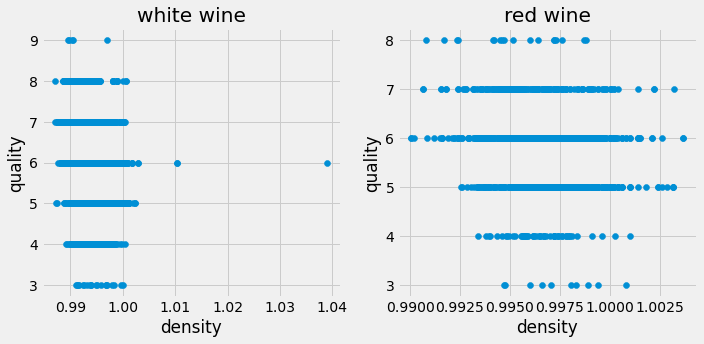

grad_1: 0.5831540037037609, grad_2: -0.30198312578737774, constant_1: 4.018658895088134, constant_2: 6.635922826758927


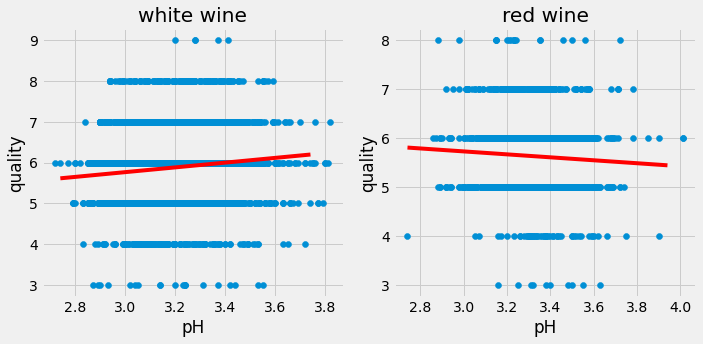

grad_1: 0.4165507227092698, grad_2: 1.197712323031371, constant_1: 5.673863280425765, constant_2: 4.847749534389136


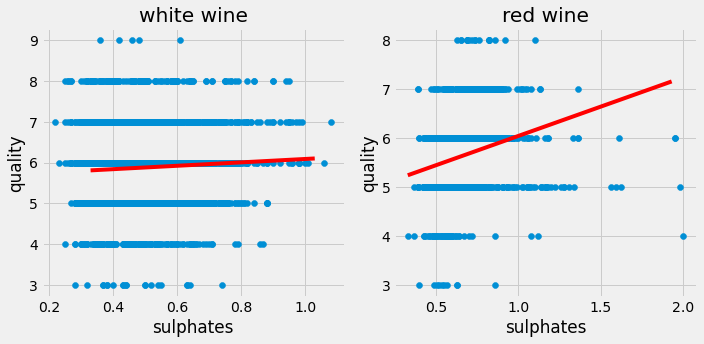

grad_1: 0.31346930191183553, grad_2: 0.3608417653350341, constant_1: 2.5820093991748836, constant_2: 1.8749748869971734


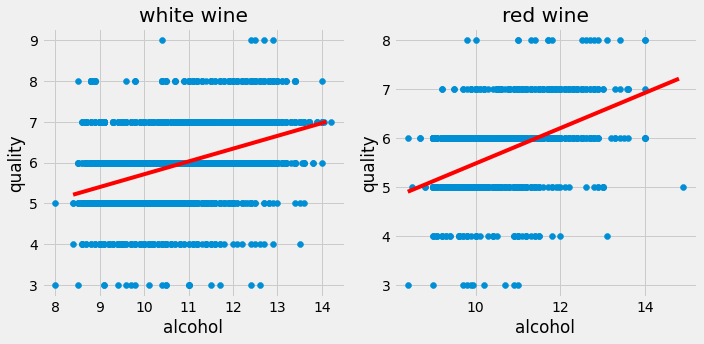

In [40]:
feature_units = {'fixed acidity': 'g/dm3',
                        'volatile acidity': 'g/dm3',
                        'citric acid': 'g/dm3',
                        'residual sugar': 'g/dm3',
                        'chlorides': 'g/dm3',
                        'free sulfur dioxide':'mg/dm3',
                        'total sulfur dioxide':'mg/dm3',
                        'density': 'g/cm3',
                        'pH': '',
                        'sulphates': 'g/dm3',
                        'alcohol': '%'
                        }
for feature in feature_units:
    create_2D_scatter_line(white_wine, red_wine, feature, 'quality')

In [41]:
"""
Function for detecting outliers. 

Two input parameters: dataframe, column label

Output: one tuple 
(int1, int2, list1, list2)

int1 = number of upper outliers
int2 = number of lower outliers
list1 = row numbers of upper outliers
list2 = row numbers of lower outliers
"""

def detect_outliers(df, column):
    Q1 = np.percentile (df[column], 25)
    Q3 = np.percentile (df[column], 75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR        # upper value threshold
    lower = Q1 - 1.5*IQR        # lower value threshold

    upper_mask = df[column] >= upper
    lower_mask = df[column] <= lower

    num_upper_outliers = len (df[upper_mask][column].values)
    num_lower_outliers = len (df[lower_mask][column].values)

    rows_upper_outliers = list (np.where(upper_mask)[0])      # indices for upper outliers as a list 
    rows_lower_outliers = list(np.where(lower_mask)[0])      # indices for lower outliers as a list

    return (num_upper_outliers, num_lower_outliers, rows_upper_outliers, rows_lower_outliers)

In [42]:
"""
Function for removing outliers from a df column

input params: df, column 
output: df with outlier rows dropped
"""

def drop_outliers (df, column):
    int1, int2, list1, list2 = detect_outliers(df, column)
    temp = df.copy()                            # important to call .copy() method, otherwise the original df also gets modified
    temp.drop(list1, inplace = True)
    temp.drop(list2, inplace = True)
    temp.Name = df.Name                         # Make sure to give the temp dataframe the same name; will need this later when plotting.
    return temp


In [43]:
"""
Great. 

Now let's call the function detect_outliers() for the dataframes white_wine and red_wine. 

Using a for loop, and the function's outputs, we'll create dataframes to show
how many upper and lower outliers there are for each feature. 
"""


features = ['fixed acidity','volatile acidity','citric acid',
            'residual sugar','chlorides','free sulfur dioxide',
            'total sulfur dioxide', 'density','pH','sulphates','alcohol']

# Initialise dicts
white_num_outliers = {}
red_num_outliers = {}

for feature in features:
    num_upper, num_lower, list_upper, list_lower = detect_outliers(white_wine, feature) # Only interested in num_upper and num_lower
    white_num_outliers[feature] = [num_upper, num_lower]                                # Save as values in dictionary

    num_upper, num_lower, list_upper, list_lower = detect_outliers(red_wine, feature)
    red_num_outliers[feature] = [num_upper, num_lower]

# Convert into dataframe
white_outliers = pd.DataFrame.from_dict(white_num_outliers, orient = 'index')
white_outliers.columns = ['num_upper_fliers', 'num_lower_fliers']

# Convert into dataframe
red_outliers = pd.DataFrame.from_dict(red_num_outliers, orient = 'index')
red_outliers.columns = ['num_upper_fliers', 'num_lower_fliers']

display (white_outliers)
display (red_outliers)

# Look at as percentage of total count

,num_upper_fliers,num_lower_fliers
fixed acidity,123,23
volatile acidity,186,0
citric acid,185,85
residual sugar,7,0
chlorides,201,7
free sulfur dioxide,50,0
total sulfur dioxide,14,5
density,5,0
pH,66,9
sulphates,124,0


,num_upper_fliers,num_lower_fliers
fixed acidity,49,0
volatile acidity,19,0
citric acid,1,0
residual sugar,155,0
chlorides,103,9
free sulfur dioxide,33,0
total sulfur dioxide,58,0
density,24,21
pH,21,14
sulphates,59,0


grad_1: -0.08891500636086437, grad_2: 0.060391712831431826, constant_1: 6.495820195467596, constant_2: 5.134789709197887


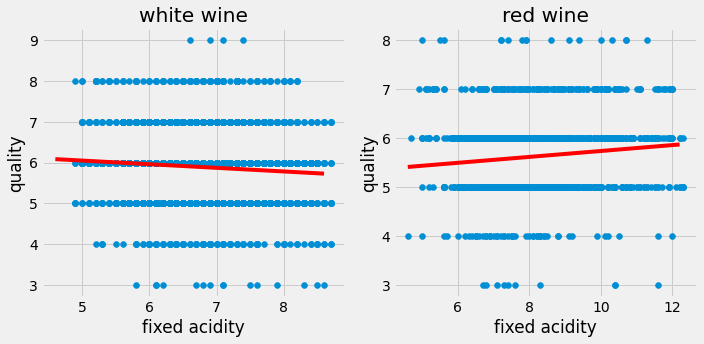

grad_1: -1.5884465577389355, grad_2: -1.7376932315721012, constant_1: 6.322891718103899, constant_2: 6.554562810529914


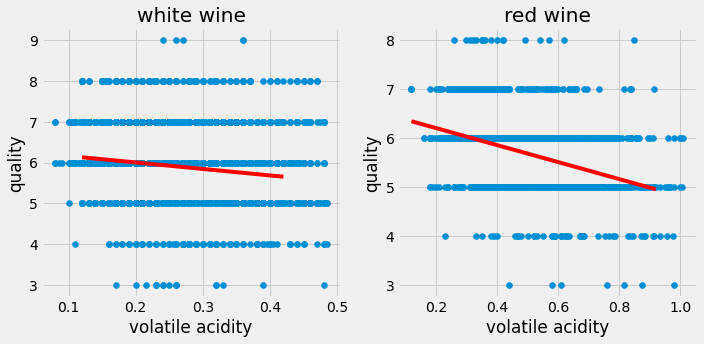

grad_1: 0.1769024149331096, grad_2: 0.96660996280643, constant_1: 5.846132970496463, constant_2: 5.375559561438289


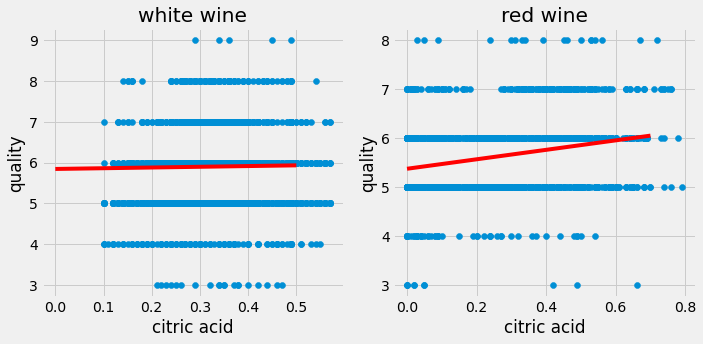

grad_1: -0.01781780825894227, grad_2: 0.06722929017954443, constant_1: 5.991359835244529, constant_2: 5.489876982896012


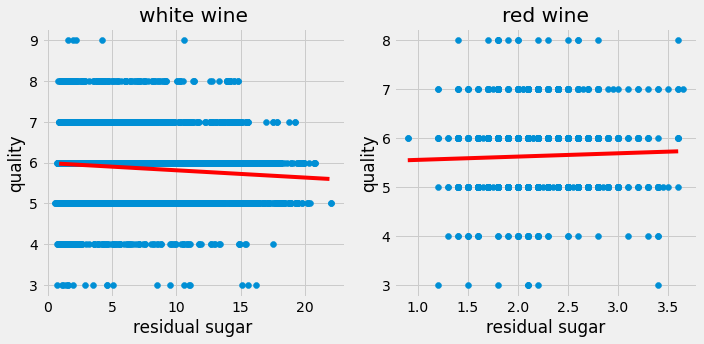

grad_1: -25.031101998630774, grad_2: -9.119168425408777, constant_1: 6.959398952409372, constant_2: 6.367145806522954


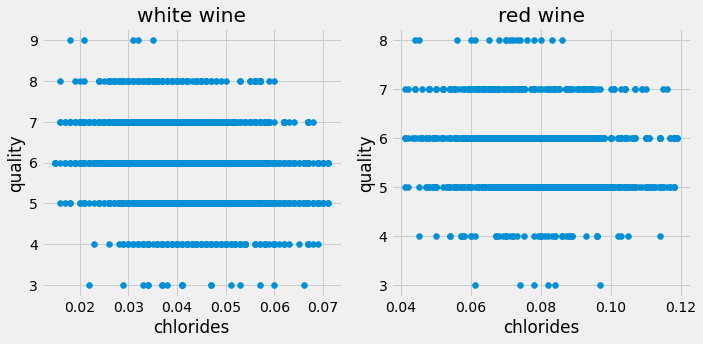

grad_1: 0.0019938271614461625, grad_2: -0.004693282889331802, constant_1: 5.811309703217429, constant_2: 5.707685503039629


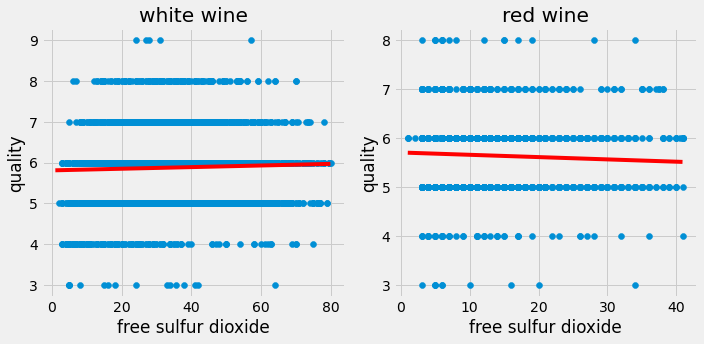

grad_1: -0.003543379456610323, grad_2: -0.0051345479366932565, constant_1: 6.3716092657011565, constant_2: 5.8734543308737


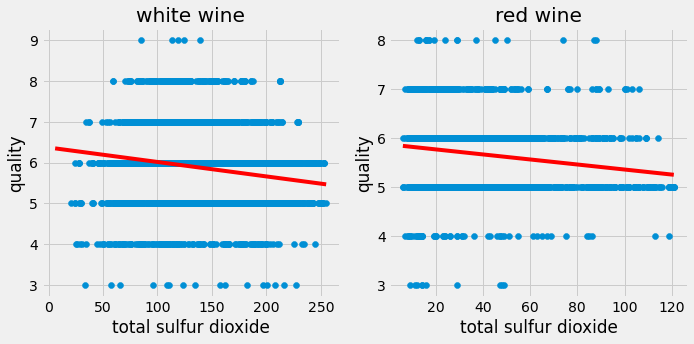

grad_1: -97.22629189374169, grad_2: -80.77023450376308, constant_1: 102.52148593210529, constant_2: 86.12875102616972


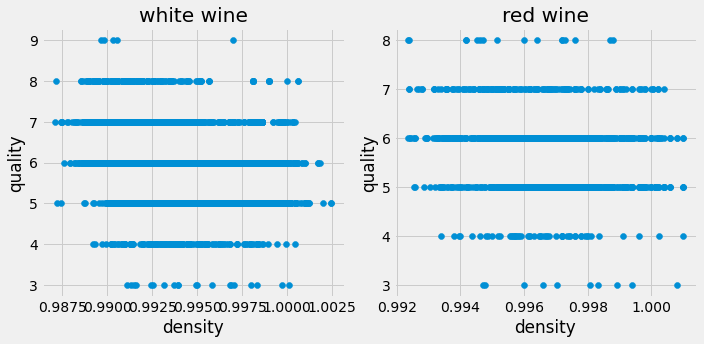

grad_1: 0.683999417479755, grad_2: -0.4409473177947092, constant_1: 3.7019857643847196, constant_2: 7.0919866328658685


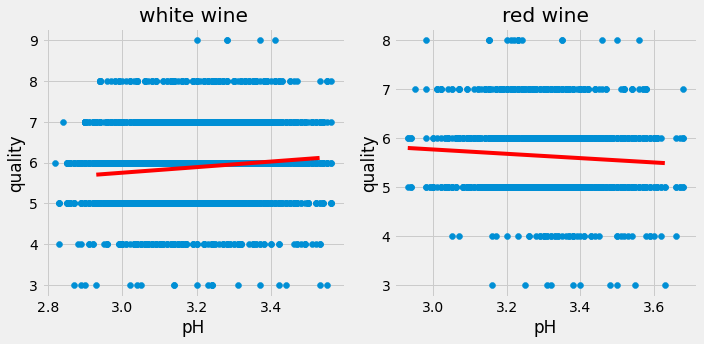

grad_1: 0.16005122687687173, grad_2: 2.6231353052502158, constant_1: 5.790679690299392, constant_2: 3.968258149370368


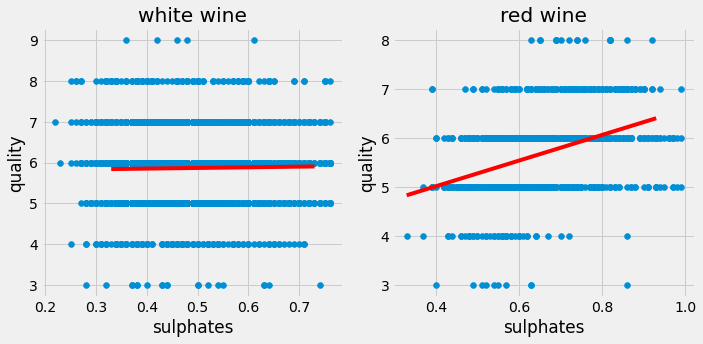

grad_1: 0.31346930191183553, grad_2: 0.37149962790783786, constant_1: 2.5820093991748836, constant_2: 1.7669806440142342


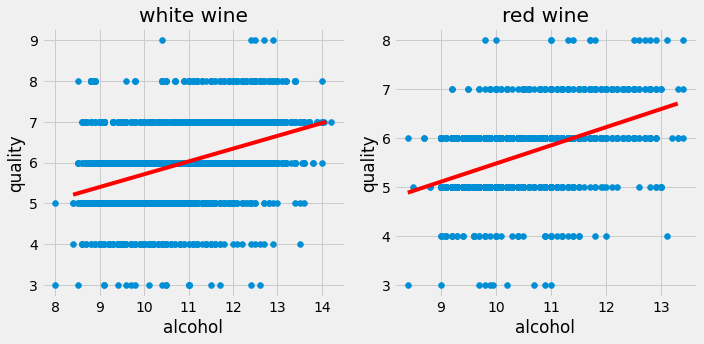

'\nAdd hue to indicate density of plots.\n'

In [44]:
"""
Alright. Now let's use drop_outliers() to create scatter plots without the outliers.
"""
features = ['fixed acidity','volatile acidity','citric acid',
            'residual sugar','chlorides','free sulfur dioxide',
            'total sulfur dioxide', 'density','pH','sulphates','alcohol']

temp1 = []
temp2 = []

for i, feature in enumerate(features):

    temp1.append(drop_outliers(white_wine,feature))    # temp1 now stores the dataframe 'white_wine', but the rows containing outliers for 'feature' are dropped
    temp2.append(drop_outliers(red_wine,feature))
    create_2D_scatter_line(temp1[i], temp2[i], feature, 'quality')


"""
Add hue to indicate density of plots.
"""

In [45]:
"""
In some of the plots, you don't get a straight line.
This is likely because the features are incremented by too small a number.
Feature scaling would likely help.

"""

"\nIn some of the plots, you don't get a straight line.\nThis is likely because the features are incremented by too small a number.\nFeature scaling would likely help.\n\n"

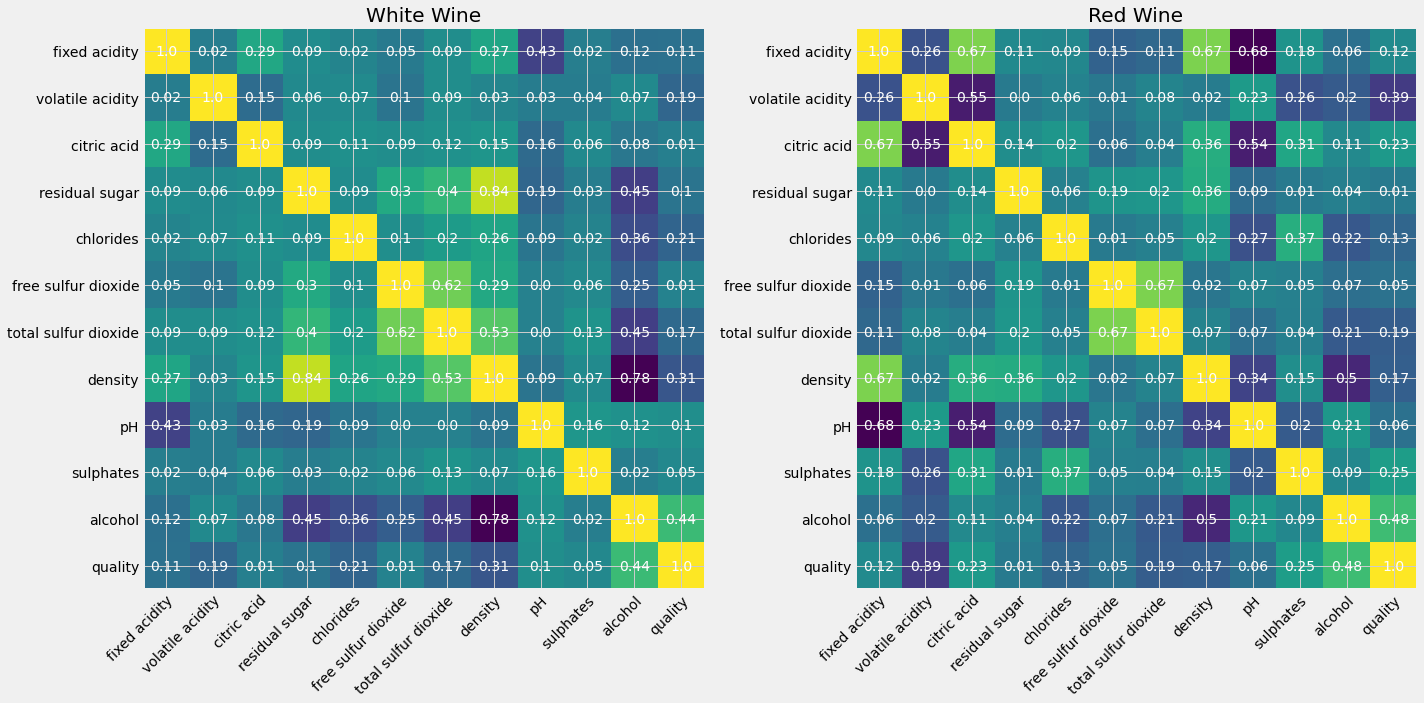

In [46]:
"""
Create heatmap of wine variables
"""

# Select only columns with numeric values
white_wine_nums = white_wine.select_dtypes(include = ['float64', 'int64'])
red_wine_nums = red_wine.select_dtypes(include = ['float64', 'int64'])

# Store column labels
features = white_wine_nums.columns

# Call .corr() method on the two data frames, 
# then convert the correlation matrices into numpy arrays
white_wine_nums = white_wine_nums.corr().to_numpy()
red_wine_nums = red_wine_nums.corr().to_numpy()

# Create fig and axes
fig, ax = plt.subplots(1, 2, figsize = (20,10))

# Display data as image
im_white = ax[0].imshow(white_wine_nums)

# Want to show all xticks and yticks
ax[0].set_xticks(np.arange(len(white_wine_nums)))
ax[0].set_yticks(np.arange(len(white_wine_nums)))

# Add labels to xticks and yticks
ax[0].set_xticklabels(features)
ax[0].set_yticklabels(features)

# Rotate the tick labels and set their alignment.
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# Round correlation coefficient to two decimal figures
# and use absolute value for greater clarity.

for i in range(len(features)):
    for j in range(len(features)):
        text = ax[0].text(j, i, abs(round(white_wine_nums[i, j],2)),
                       ha="center", va="center", color="w")   
          

ax[0].set_title('White Wine')


im_red = ax[1].imshow(red_wine_nums)

ax[1].set_xticks(np.arange(len(red_wine_nums)))
ax[1].set_yticks(np.arange(len(red_wine_nums)))

# Add labels to xticks and yticks
ax[1].set_xticklabels(features)
ax[1].set_yticklabels(features)

# Rotate the tick labels and set their alignment.
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# Round correlation coefficient to two decimal figures
# and use absolute value for greater clarity.

for i in range(len(features)):
    for j in range(len(features)):
        text = ax[1].text(j, i, abs(round(red_wine_nums[i, j],2)),
                       ha="center", va="center", color="w")             

ax[1].set_title('Red Wine')



plt.tight_layout()
plt.show()